[View in Colaboratory](https://colab.research.google.com/github/kundajelab/ssvmimp/blob/master/lsgkmexplain.ipynb)

In [0]:
!rm -r lsgkm
!git clone https://github.com/kundajelab/lsgkm.git lsgkm
%cd lsgkm/src
!make
%cd ../..

In [0]:
!pip install deeplift #for visualization

In [3]:
!lsgkm/src/gkmexplain lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt

INFO 2018-10-04 21:49:14: Number of threads is set to 1
INFO 2018-10-04 21:49:14: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2018-10-04 21:49:14: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt
INFO 2018-10-04 21:49:21: 69 scored


In [5]:
!head lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt

svm_type c_svc
kernel_type gkm_esttrunc
L 10
k 6
d 3
nr_class 2
total_sv 958
rho 0.379216
label 1 -1
nr_sv 435 523


In [0]:
import numpy as np

#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels)
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
#read in the fasta files and one-hot encode
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.fa"))
              if i%2==1]
onehot_data = np.array([one_hot_encode_along_channel_axis(x)
                         for x in fasta_seqs])
#read in the importance scores
impscores = [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt")
]

0.8714090764


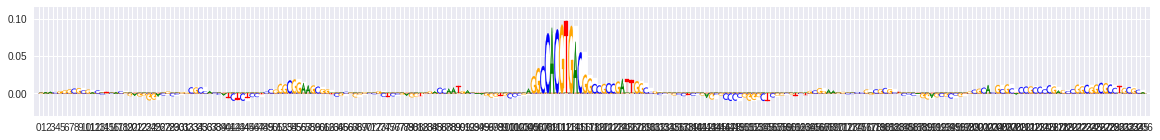

0.49278370521000014


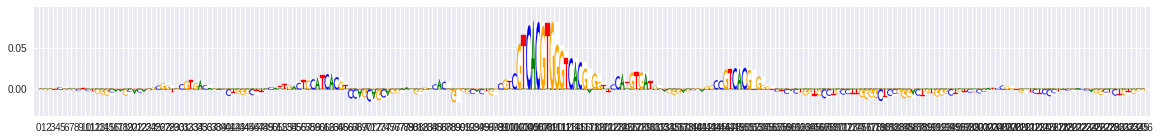

0.36159730199999995


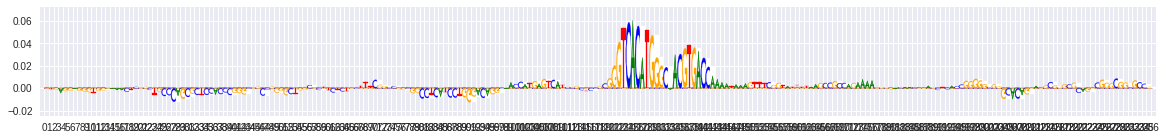

-0.0734240638


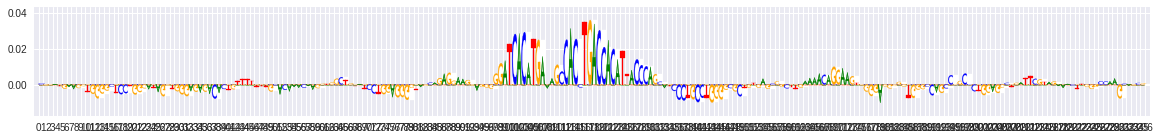

0.8780292366999998


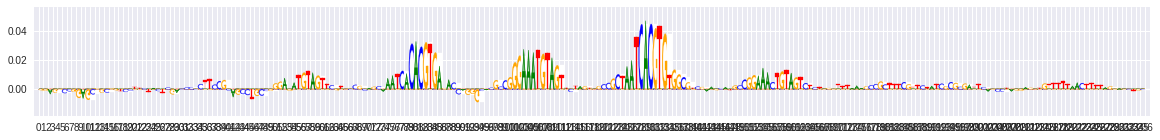

2.0558834311300003


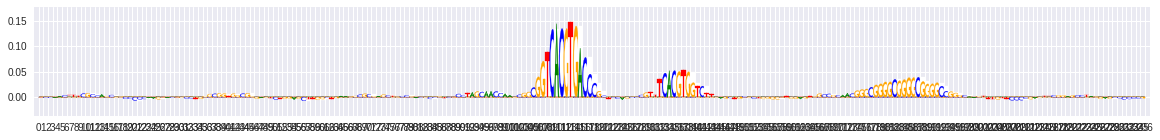

1.7913296632


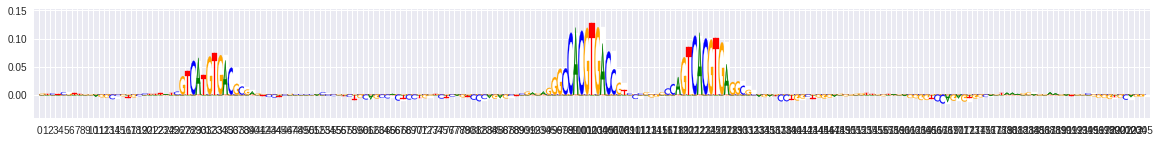

0.9232300379000002


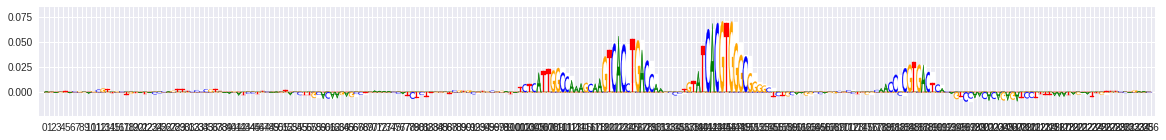

0.43344680150000003


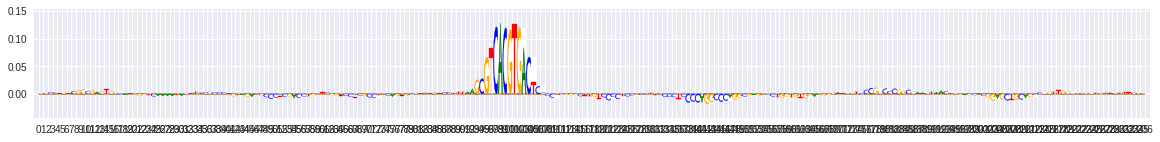

1.9475318665999999


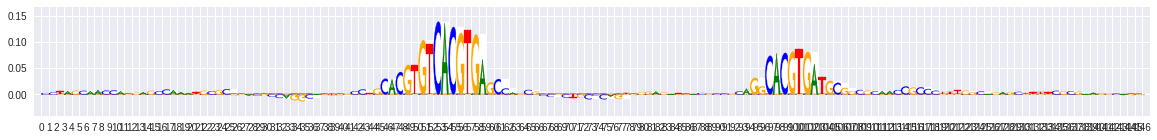

In [6]:
from deeplift.visualization import viz_sequence
for i in range(10):
  print(np.sum(impscores[i]) - 0.379216)
  viz_sequence.plot_weights(impscores[i])